Problem 1: Variance in the coalescent
===

A few imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, poisson

Population parameters

In [2]:
N = 10000
n = 100
mu = 0.003
loci = 10

S_empirical = 1000

# the number of samples we'll use for simulating distributions
samples = 1000

Define a convenience function for the binomial coefficient $\binom{i}{2}$

In [3]:
def i_choose_2(i):
    return i * (i - 1) / 2

Generator yielding sequence of simulated intercoalescent time intervals
$\mathbb{E}[T_n], \mathbb{E}[T_{n-1}], \dots, \mathbb{E}[T_2]$

In [4]:
def intercoalescent_times(N, n):
    for i in range(2, n + 1):
        rate = i_choose_2(i) / (2 * N)
        yield expon.rvs(scale=1/rate)

For example

In [5]:
sum(intercoalescent_times(N, n))

56134.719797050115

Similarly, a generator yeilding the expected times

In [6]:
def intercoalescent_times_expected(N, n):
    for i in range(2, n + 1):
        yield 2 * N / i_choose_2(i)

For example

In [7]:
sum(intercoalescent_times_expected(N, n))

39599.99999999999

Use these functions to simulate the distribution of TMRCA for one locus

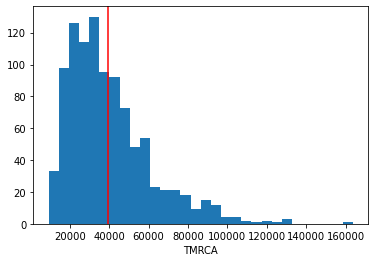

In [8]:
plt.hist([sum(intercoalescent_times(N, n)) for _ in range(samples)], bins=30)
plt.axvline(sum(intercoalescent_times_expected(N, n)), color='r')
plt.xlabel('TMRCA');

Function to simulate the number of segregating sites

In [9]:
def S(N, n, mu):
    return sum(poisson.rvs(mu * i * Ti) for i, Ti in enumerate(intercoalescent_times(N, n), 2))

For example

In [10]:
S(N, n, mu)

524

Similarly, a function giving the expected $S$

In [11]:
def S_expected(N, n, mu):
    return sum(mu * i * Ti for i, Ti in enumerate(intercoalescent_times_expected(N, n), 2))

For example

In [12]:
S_expected(N, n, mu)

621.2853021167543

Use these functions to simulate the distribution of $S$ for one locus

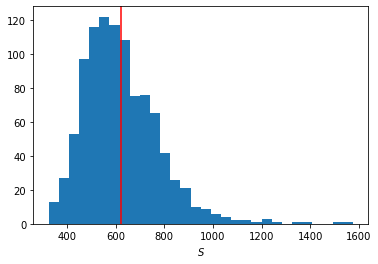

In [13]:
plt.hist([S(N, n, mu) for _ in range(samples)], bins=30)
plt.axvline(S_expected(N, n, mu), color='r')
plt.xlabel('$S$');

Plot the simulated distribution of the max $S$ value, and indicate its observe value

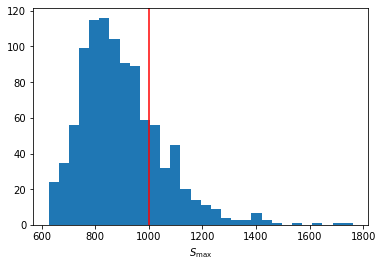

In [14]:
# null simulation values
Smax_null = np.array([max(S(N, n, mu) for _ in range(loci)) for _ in range(samples)])

plt.hist(Smax_null, bins=30)
plt.axvline(S_empirical, color='r')
plt.xlabel('$S_{\\max}$');

$p$-value for $S_{\rm max}$ observed accross loci.

In [15]:
sum(Smax_null >= S_empirical) / samples

0.22

Are we impressed? No.